<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Сводная-таблица" data-toc-modified-id="Сводная-таблица-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Сводная таблица</a></span></li><li><span><a href="#График-доходов" data-toc-modified-id="График-доходов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>График доходов</a></span></li></ul></div>

# Тестовое задание 

Для решения тестового задания необходимо изучить представленные данные, сделать предобработку и выполнить основные пункты технического задания.

**Задачи:**

* Создать сводную табицу, которая отразит доход и расход по дням;
* Построить график дохода (по дням).

## Изучение данных из файла

Первым делом нужно импортировать библиотеки.

In [1]:
import pandas as pd # импорт библиотек
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

from io import BytesIO
import requests

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Далее прочитаем файл с данными и запишем его в переменную `df`.

In [2]:
df = pd.read_excel('Выгрузка.xlsx', sheet_name=0) # чтение файла 

In [3]:
df.head() # смотрим первые пять строк таблицы

,Date,Time,Status,Currency,Gross,Fee,Net,Transaction ID,Item Title,Balance,Balance Impact
0,2022-08-10,12:45:21,Completed,RUB,450.00,-61.46,388.54,6U7566589N2468603,Order 1283192,388.54,Credit
1,2022-08-11,10:11:36,Completed,RUB,1240.28,0.00,1240.28,6X099906R3739683W,NaN,1628.82,Credit
2,2022-08-18,03:25:51,Completed,RUB,-1628.82,0.00,-1628.82,5C304739RT393572S,NaN,0.00,Debit
3,2022-09-11,09:44:57,Completed,RUB,450.00,-61.46,388.54,7SC2944021323101N,Order 1298867,388.54,Credit
4,2022-09-29,07:38:49,Completed,RUB,-388.54,0.00,-388.54,3AU17784WP490160T,NaN,0.00,Debit


**Общая информация о датафрейме:**

In [4]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            117 non-null    datetime64[ns]
 1   Time            117 non-null    object        
 2   Status          117 non-null    object        
 3   Currency        117 non-null    object        
 4   Gross           117 non-null    float64       
 5   Fee             117 non-null    float64       
 6   Net             117 non-null    float64       
 7   Transaction ID  117 non-null    object        
 8   Item Title      93 non-null     object        
 9   Balance         117 non-null    float64       
 10  Balance Impact  117 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 10.2+ KB


Итак, в таблице 11 столбцов. Тип данных в столбцах: `datetime64`, `object`, `float64`.

Согласно документации к данным:

* Date — Дата;
* Time — Время;
* Status — Статус;
* Currency — Валюта;
* Gross — Валовая выручка;
* Fee — Налог;
* Net — Чистая прибыль;
* Transaction ID — Идентификатор транзакции;
* Item Title — Название;
* Balance — Баланс;
* Balance Impact — Дебет/Кредит.

Изменяю названия столбцов для удобного использования:

In [5]:
df.columns

Index(['Date', 'Time', 'Status', 'Currency', 'Gross', 'Fee', 'Net',
       'Transaction ID', 'Item Title', 'Balance', 'Balance Impact'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower()

df.rename(columns = {'transaction id' : 'transaction_id', 
                     'item title' : 'item_title', 
                     'balance impact' : 'balance_impact'}, inplace = True) 

Проверка изменений:

In [17]:
df.head(3)

,date,time,status,currency,gross,fee,net,transaction_id,item_title,balance,balance_impact,date_format
0,2022-08-10,12:45:21,Completed,RUB,450.00,-61.46,388.54,6U7566589N2468603,Order 1283192,388.54,Credit,2022-08-10
1,2022-08-11,10:11:36,Completed,RUB,1240.28,0.00,1240.28,6X099906R3739683W,NaN,1628.82,Credit,2022-08-11
2,2022-08-18,03:25:51,Completed,RUB,-1628.82,0.00,-1628.82,5C304739RT393572S,NaN,0.00,Debit,2022-08-18


Отлично, далее работа с типами данных.

**Типы данных:**

Замена типов данных для числовых значений (4 столбца):

In [8]:
df[['gross', 'fee', 'net', 'balance']] = df[['gross', 'fee', 'net', 'balance']].astype('float64')

In [9]:
df.info() #проверка 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            117 non-null    datetime64[ns]
 1   time            117 non-null    object        
 2   status          117 non-null    object        
 3   currency        117 non-null    object        
 4   gross           117 non-null    float64       
 5   fee             117 non-null    float64       
 6   net             117 non-null    float64       
 7   transaction_id  117 non-null    object        
 8   item_title      93 non-null     object        
 9   balance         117 non-null    float64       
 10  balance_impact  117 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 10.2+ KB


Готово, с числовыми данными теперь можно работать.

In [20]:
df.head(3)

,date,time,status,currency,gross,fee,net,transaction_id,item_title,balance,balance_impact,date_format
0,2022-08-10,12:45:21,Completed,RUB,450.00,-61.46,388.54,6U7566589N2468603,Order 1283192,388.54,Credit,2022-08-10
1,2022-08-11,10:11:36,Completed,RUB,1240.28,0.00,1240.28,6X099906R3739683W,NaN,1628.82,Credit,2022-08-11
2,2022-08-18,03:25:51,Completed,RUB,-1628.82,0.00,-1628.82,5C304739RT393572S,NaN,0.00,Debit,2022-08-18


Для интереса посмотрим на даты начала и конца периода в наших данных:

In [11]:
df['date'].agg(['min', 'max'])

min   2022-08-10
max   2022-10-31
Name: date, dtype: datetime64[ns]

* Минимальная дата: `2022-08-10`;
* Максимальная дата: `2022-10-31`.

## Сводная таблица

Необходимо построить сводную таблицу, которая отразит доход и расход по дням. 

Таблица будет представлена в двух вариантах:
* первый вариант - с помощью pivot_table (сводная таблица);
* второй вариант с помощью группировки.

In [12]:
df_pivot = df.pivot_table(values='net', index='date', columns='balance_impact', aggfunc='sum').fillna('') #строим сводную таблицу
df_pivot = df_pivot.reset_index()
df_pivot.columns = ['Дата', 'Доход', 'Расход']

df_pivot

,Дата,Доход,Расход
0,2022-08-10,388.54,
1,2022-08-11,1240.28,
2,2022-08-18,,-1628.82
3,2022-09-11,388.54,
4,2022-09-29,,-388.54
5,2022-10-07,4508.0,
6,2022-10-08,9587.05,-4508.0
7,2022-10-09,8813.94,-9587.05
8,2022-10-10,,-8813.94
9,2022-10-11,3031.83,


Таблица доходов с помощью метода `groupby`.

In [21]:
df_group = df.groupby(['date', 'balance_impact']).agg({'net':'sum'})
df_group = df_group.reset_index()
df_group.columns = ['Дата', 'Признак', 'Итог']
df_group.replace({'Credit':'Доход',
                  'Debit':'Расход'})

,Дата,Признак,Итог
0,2022-08-10,Доход,388.54
1,2022-08-11,Доход,1240.28
2,2022-08-18,Расход,-1628.82
3,2022-09-11,Доход,388.54
4,2022-09-29,Расход,-388.54
5,2022-10-07,Доход,4508.00
6,2022-10-08,Доход,9587.05
7,2022-10-08,Расход,-4508.00
8,2022-10-09,Доход,8813.94
9,2022-10-09,Расход,-9587.05


Таблицы готовы, далее необходимо построить график доходов.

## График доходов

In [14]:
plt.style.use('seaborn') #используем стиль отображения графиков seaborn

В первую очередь создаю столбец с датой:

In [15]:
df['date_format'] = df['date'].dt.date

Теперь можно строить график доходов по дням с помощью `matplotlib`:

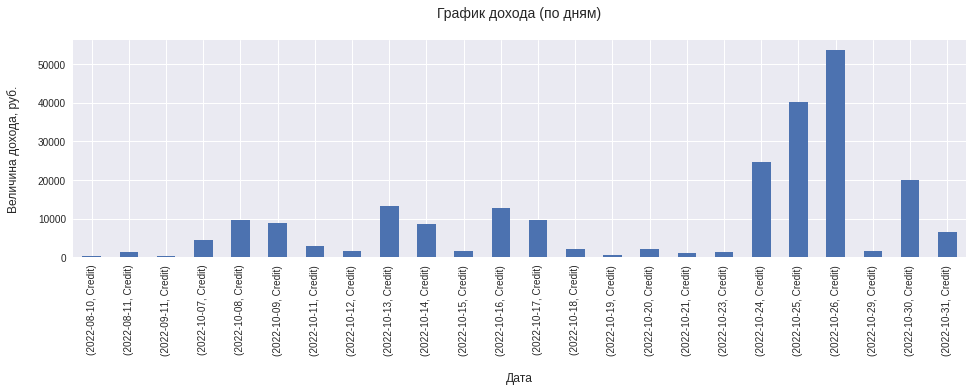

In [16]:
(df
 .groupby(['date_format', 'balance_impact']).agg({'net':'sum'}).query('net > 0')
 .plot(kind='bar', figsize=(16,4))
)
plt.title('График дохода (по дням)'+ "\n", size=14) # строим график
plt.xlabel("\n" + 'Дата', size=12)
plt.ylabel('Величина дохода, руб.' + "\n", size=12)
plt.tick_params(axis='x', labelsize=10, labelrotation=90)
plt.legend().set_visible(False)
plt.grid(True)

`26 октября 2022 года` в этот день доход составил `53 561,04` рублей, данный показатель стал самым большим в анализируемом периоде. 

# Информация по проекту

Данные предоставлены для выполнения тестового задания командой `Пачки`.

Тестовое задание выполнил Князев Роман, tg:`RareTreoo`.

*Дата: 03.03.2023*